# **EigenFaces**

### **Import dependencies**

In [1]:
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt

### **Pre process dataaset**

In [2]:
faces = {}

with zipfile.ZipFile("archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(),np.uint8), cv2.IMREAD_GRAYSCALE)

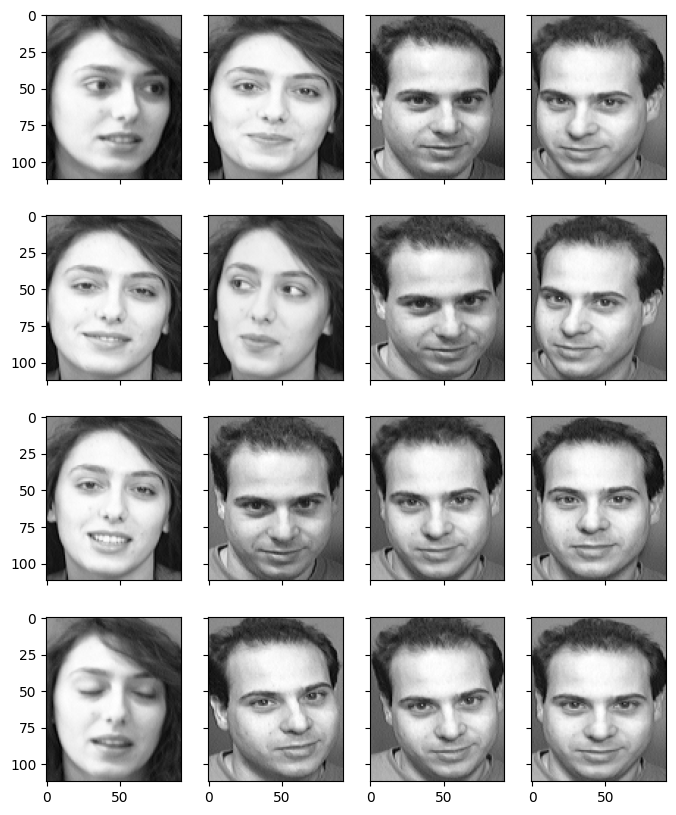

In [3]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True, figsize = (8,10))
faceimages = list(faces.values())[-16:]
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i],cmap = "gray")
plt.show()

In [4]:
faceshape = list(faces.values())[0].shape
faceshape

(112, 92)

In [5]:
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

Number of classes: 40
Number of pictures: 400


In [6]:
facematrix = []
facelabel = []

for key,val in faces.items():
    # if key.startswith("s40/"):
    #     continue
    if key.split("/")[1] == "10.pgm":
        continue
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])
facematrix = np.array(facematrix, dtype=np.float64)
mean_face = np.mean(facematrix, axis = 0)
A =facematrix - mean_face

## **Average Face**

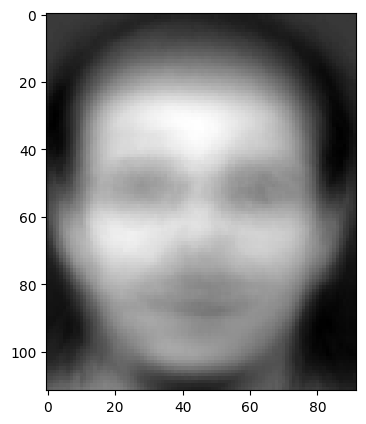

In [7]:
fig, axes = plt.subplots(figsize = (4,5))
axes.imshow(mean_face.reshape(112,92),cmap = "gray")
# plt.show()

In [8]:
covariance_matrix = np.cov(A.T, rowvar=False)
covariance_matrix

array([[1156.34511297,  115.40524932,  628.12273622, ..., -209.75979007,
         -54.57040248, -131.99202888],
       [ 115.40524932, 1355.93621306,  376.53587132, ..., -335.95556421,
        -419.28307628, -381.87173903],
       [ 628.12273622,  376.53587132, 1535.6758573 , ..., -474.80677356,
        -344.23227239, -434.28671183],
       ...,
       [-209.75979007, -335.95556421, -474.80677356, ..., 1206.15062652,
         576.72075997,  474.64538024],
       [ -54.57040248, -419.28307628, -344.23227239, ...,  576.72075997,
        1006.5920624 ,  651.38877436],
       [-131.99202888, -381.87173903, -434.28671183, ...,  474.64538024,
         651.38877436, 1161.49348283]])

## **Calculate eigen values and eigen vectors**

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvectors.shape

(360, 360)

In [10]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[sorted_indices]
sorted_eigenvectors

array([[-0.01054194,  0.08840816,  0.05898434, ...,  0.05263079,
         0.07636581, -0.00416507],
       [-0.04075753, -0.040991  ,  0.05353679, ...,  0.00711578,
        -0.02387457,  0.00477712],
       [-0.05305914,  0.06020296,  0.02871788, ..., -0.04722737,
        -0.11724362, -0.05037023],
       ...,
       [-0.01237604,  0.00992249, -0.10057856, ...,  0.06453494,
        -0.04879366, -0.05143463],
       [-0.05662315,  0.01621786, -0.06663843, ...,  0.06156364,
         0.01864548,  0.15694804],
       [-0.08664224,  0.02730855, -0.00410402, ...,  0.02841423,
        -0.06095064, -0.04604529]])

## **Eigen space/ Face space**

In [11]:
U = A.T @ sorted_eigenvectors 
U = U.T

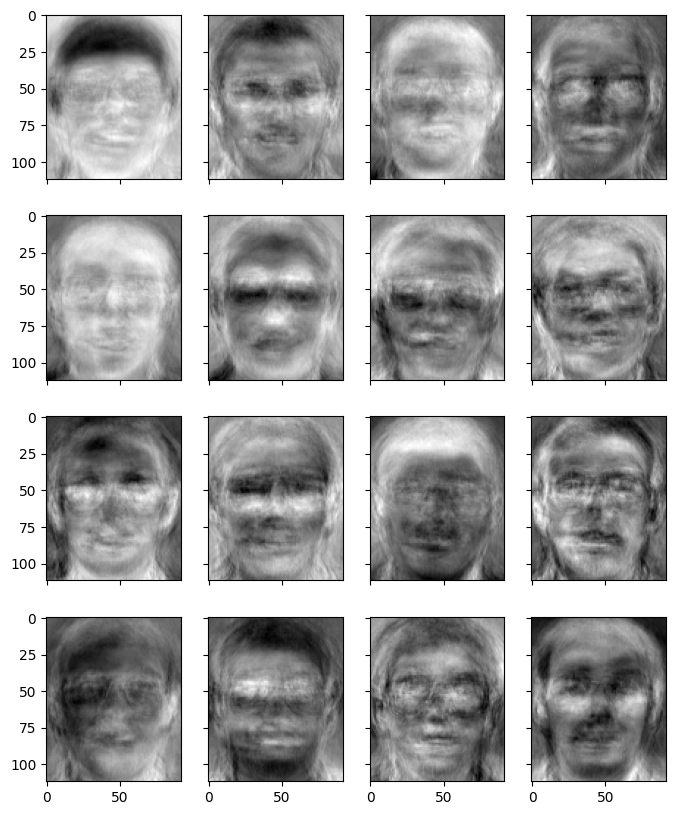

In [12]:
eigenfaces = U[:16]

fig, axes = plt.subplots(4,4, sharex= True, sharey=True, figsize= (8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap = "gray")

In [13]:
weights = eigenfaces @ (facematrix - mean_face).T

## **Tests**

Best match s1 with Euclidean distance 11410619.088999


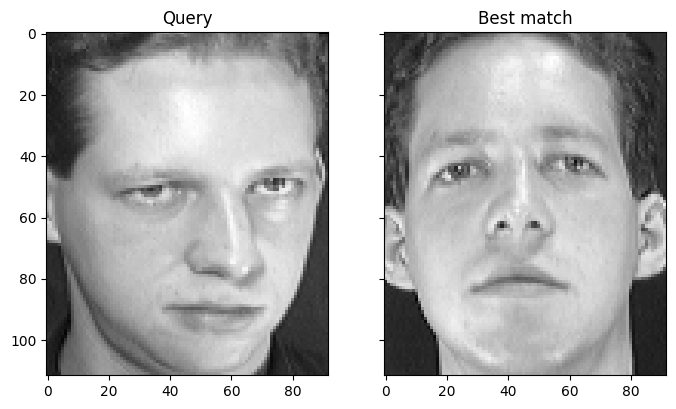

Best match s2 with Euclidean distance 4340644.258111


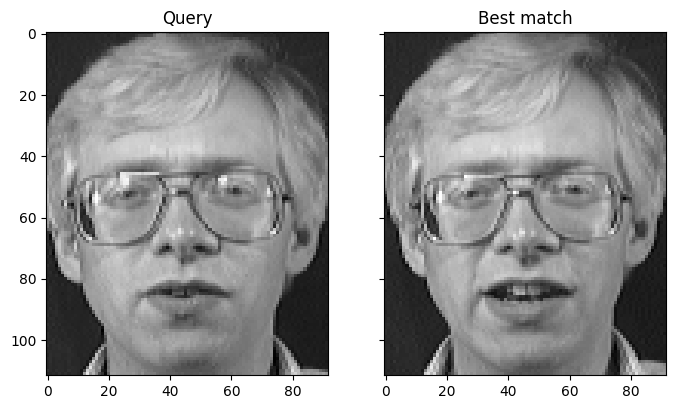

Best match s3 with Euclidean distance 5436281.160757


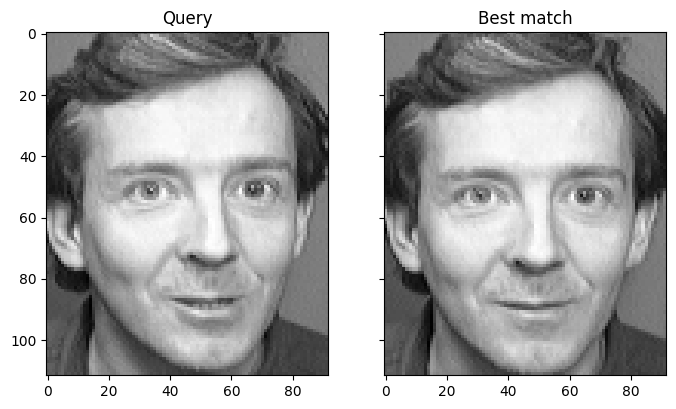

Best match s4 with Euclidean distance 9172349.168834


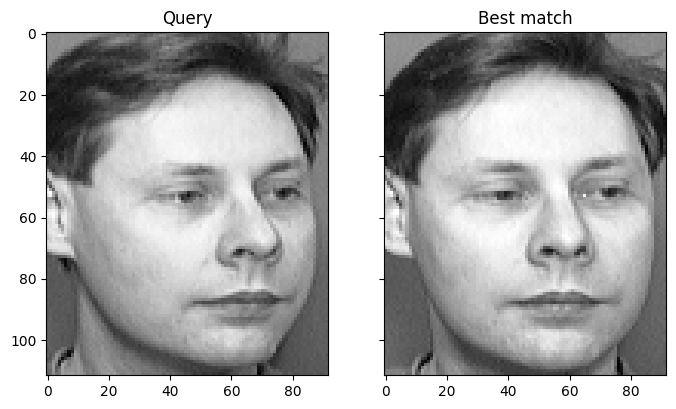

Best match s5 with Euclidean distance 8539635.126264


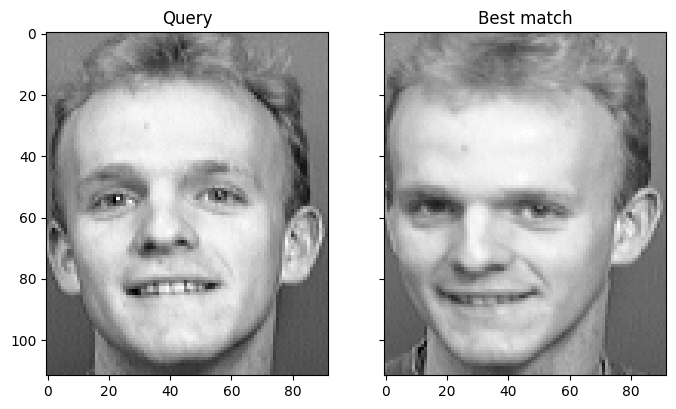

Best match s6 with Euclidean distance 2141745.239251


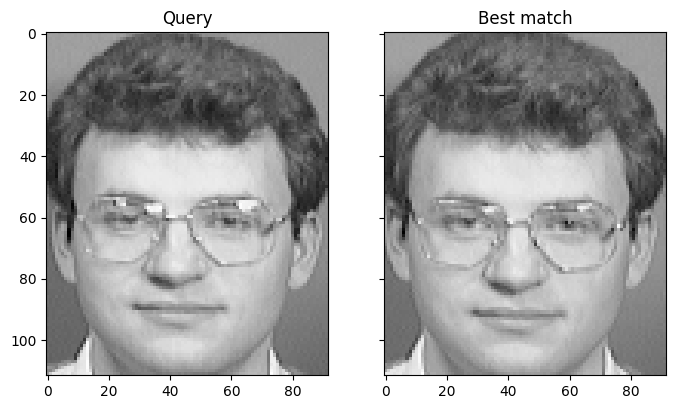

Best match s36 with Euclidean distance 11011792.616792


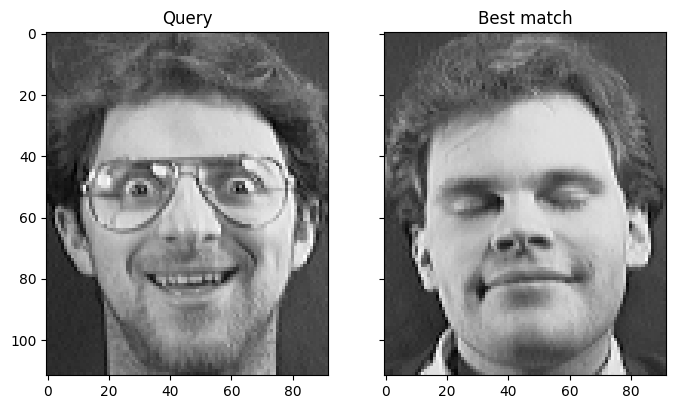

Best match s8 with Euclidean distance 3680888.487684


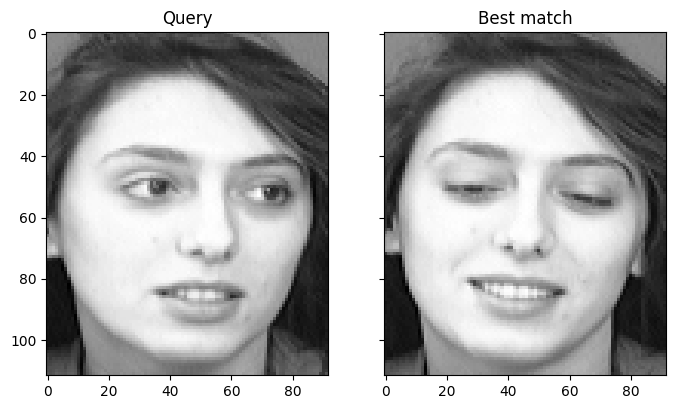

Best match s9 with Euclidean distance 8337888.746193


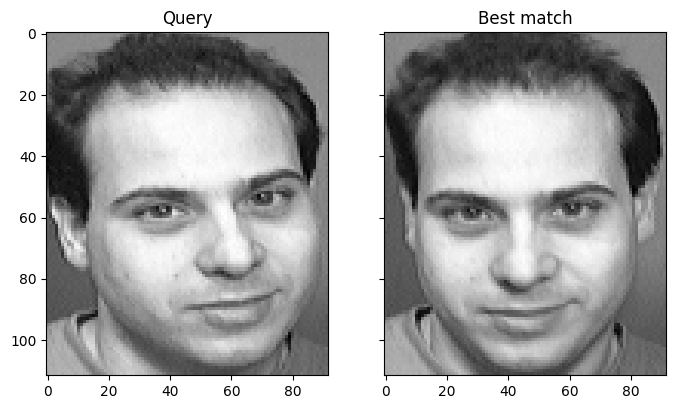

Best match s17 with Euclidean distance 17869437.233504


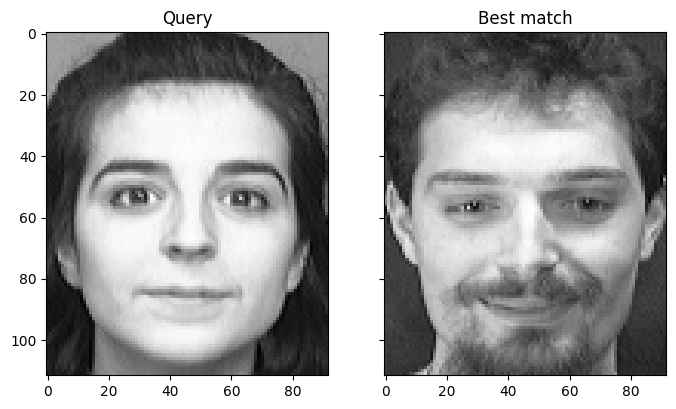

Best match s11 with Euclidean distance 7635661.435215


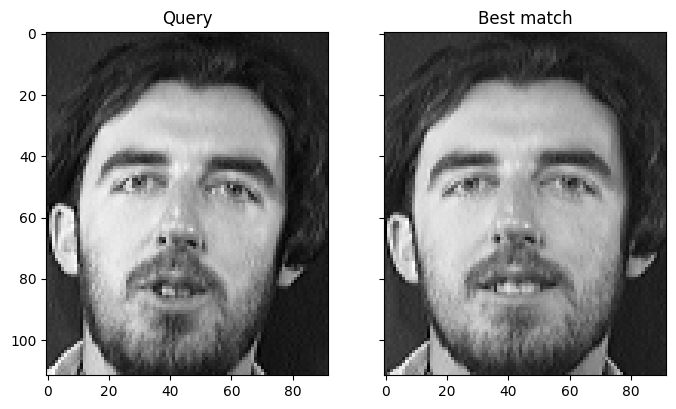

Best match s12 with Euclidean distance 4320626.343174


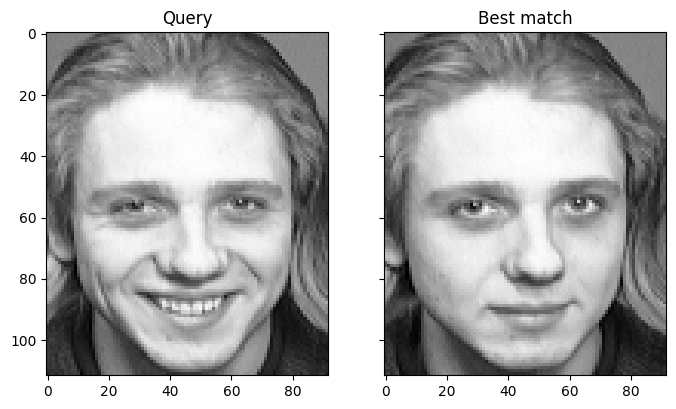

Best match s13 with Euclidean distance 1990882.556344


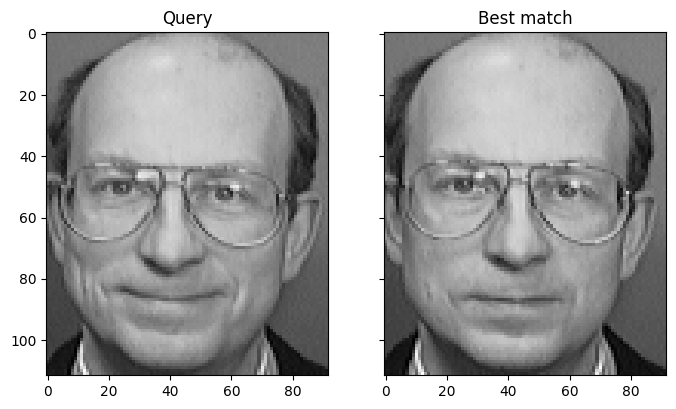

Best match s14 with Euclidean distance 11696409.919693


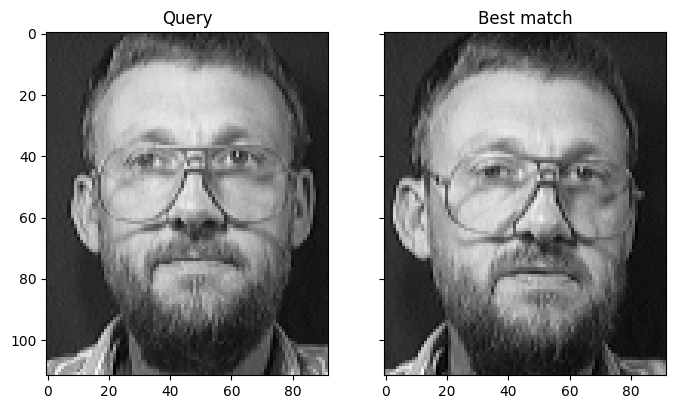

Best match s15 with Euclidean distance 2635830.788690


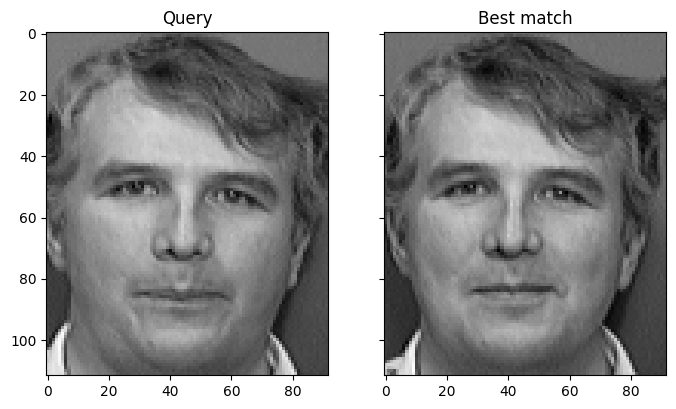

Best match s36 with Euclidean distance 11196592.525145


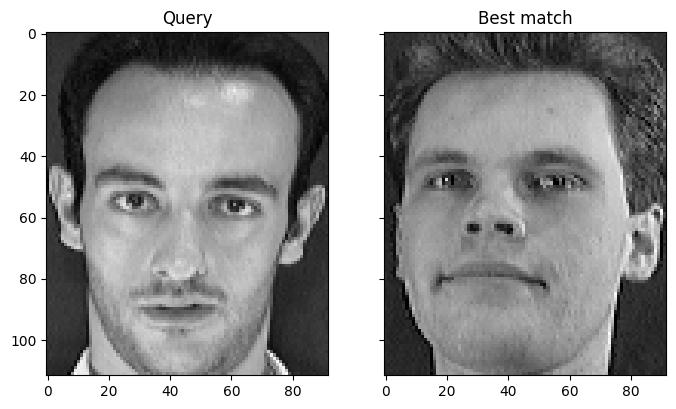

Best match s17 with Euclidean distance 6119662.114119


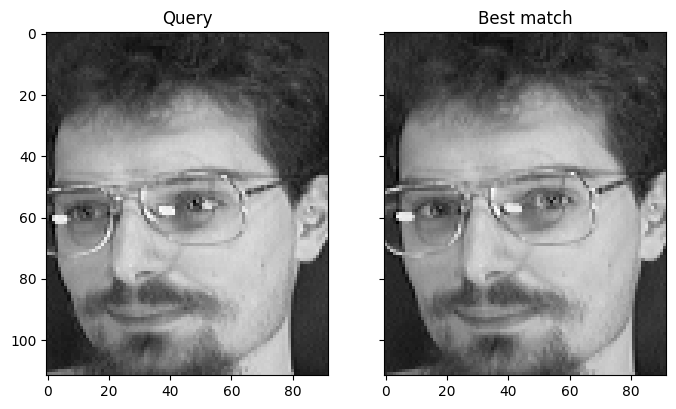

Best match s18 with Euclidean distance 8544597.184627


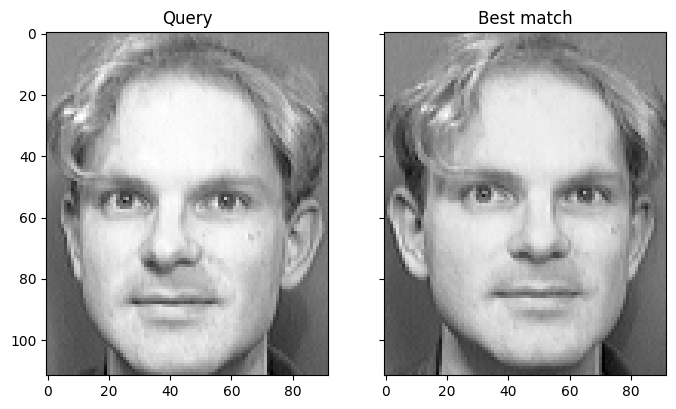

Best match s19 with Euclidean distance 9276143.471322


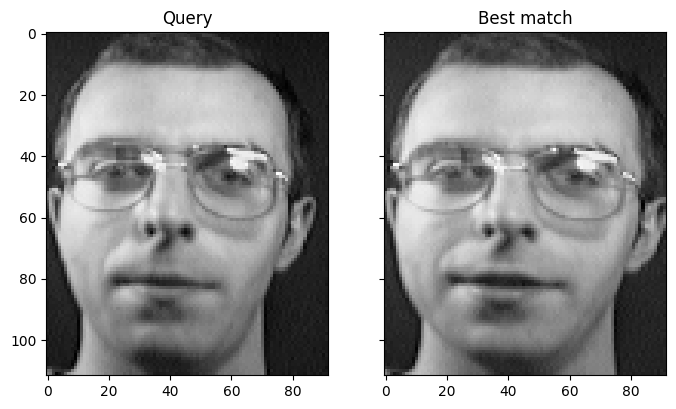

Best match s20 with Euclidean distance 4632195.572050


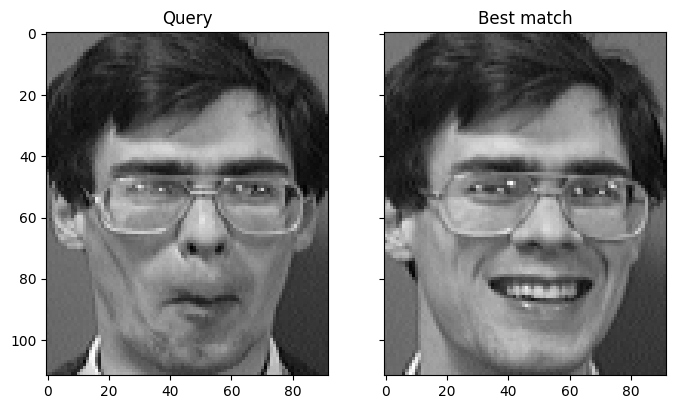

Best match s21 with Euclidean distance 3740915.615458


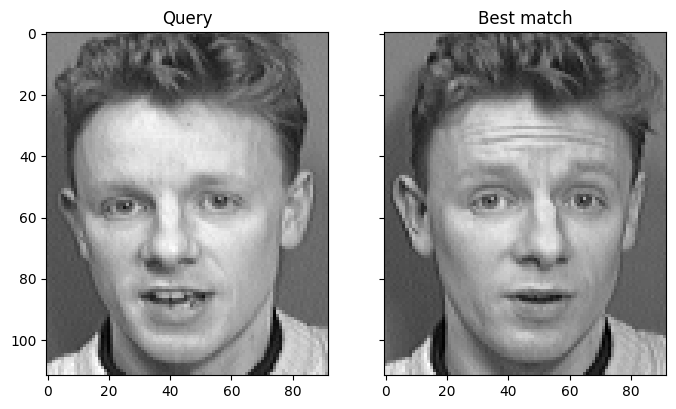

Best match s22 with Euclidean distance 4675646.575105


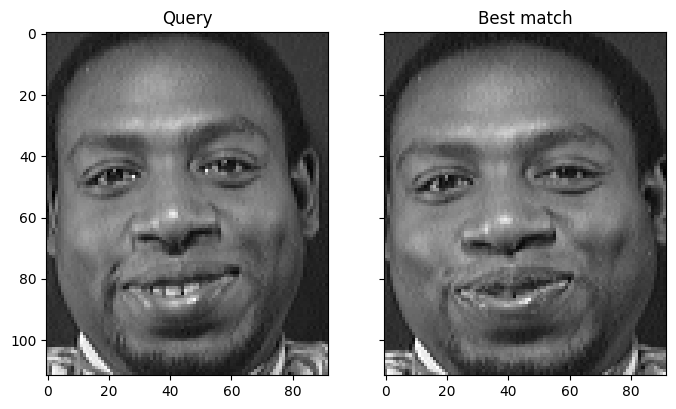

Best match s23 with Euclidean distance 6419366.369312


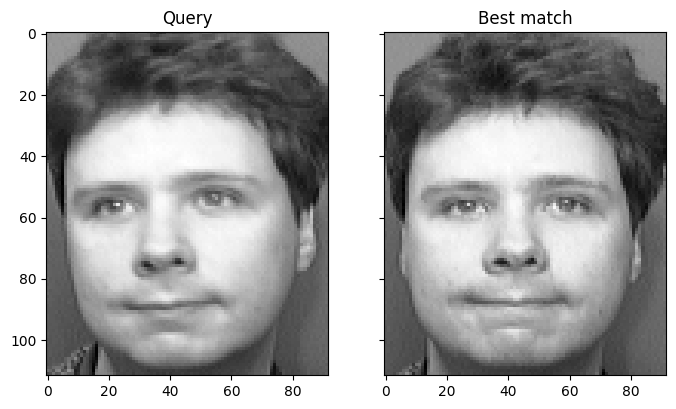

Best match s24 with Euclidean distance 7646051.450549


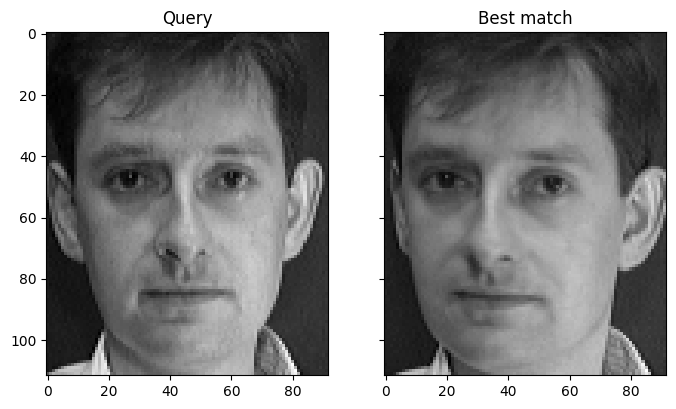

Best match s25 with Euclidean distance 3590866.439651


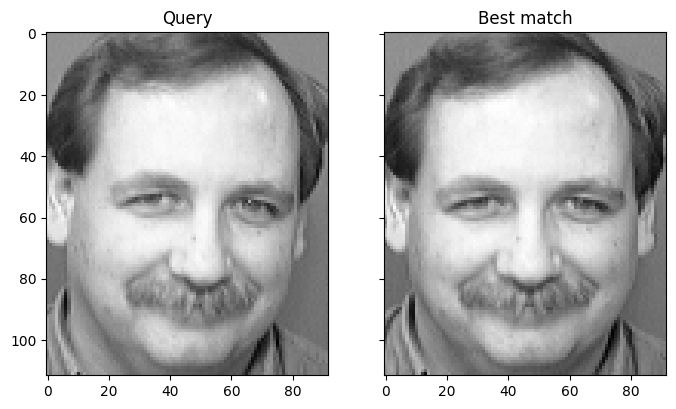

Best match s26 with Euclidean distance 2079336.026376


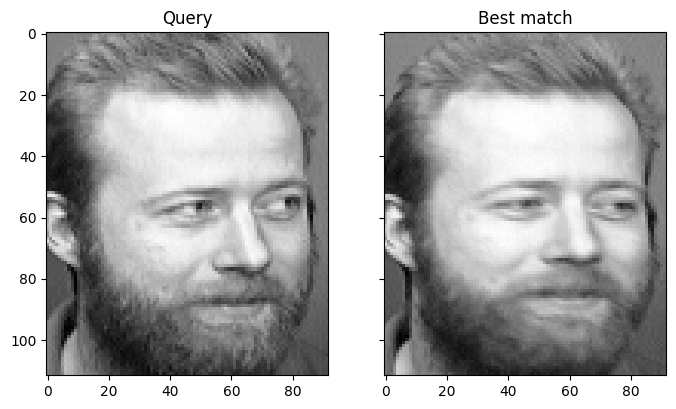

Best match s28 with Euclidean distance 12675127.108465


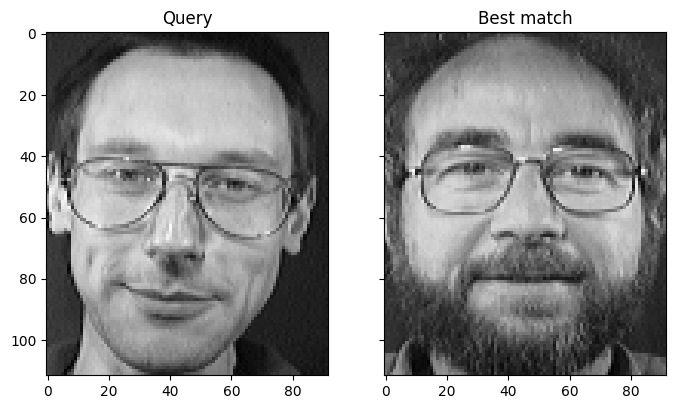

Best match s28 with Euclidean distance 9159882.316083


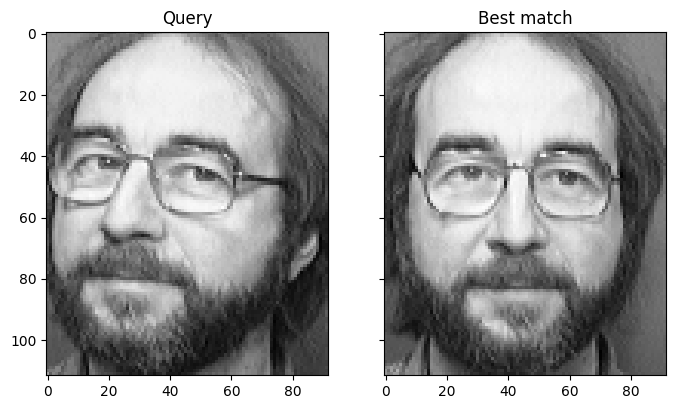

Best match s29 with Euclidean distance 8218054.582198


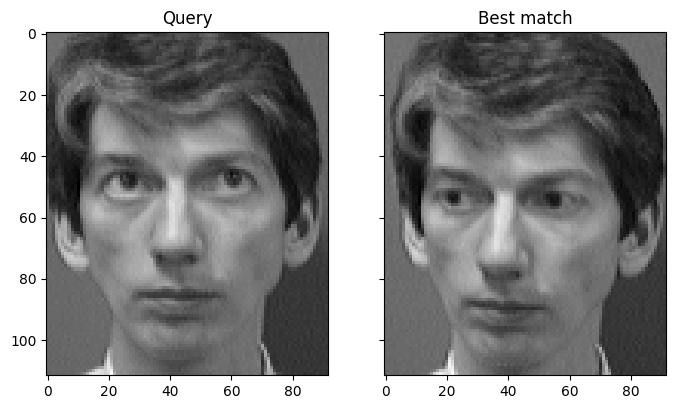

Best match s30 with Euclidean distance 3154131.929979


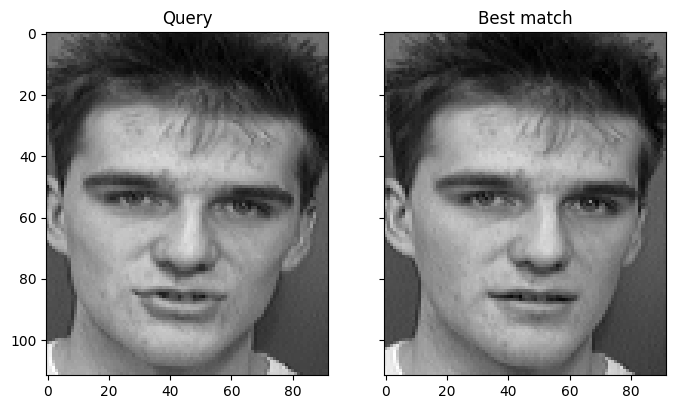

Best match s31 with Euclidean distance 4178274.712802


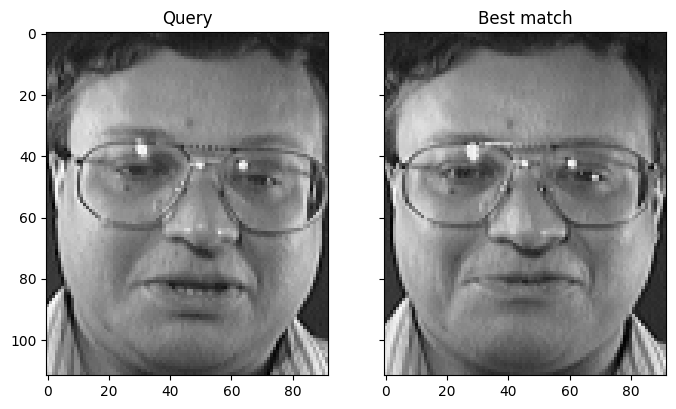

Best match s32 with Euclidean distance 5509914.814263


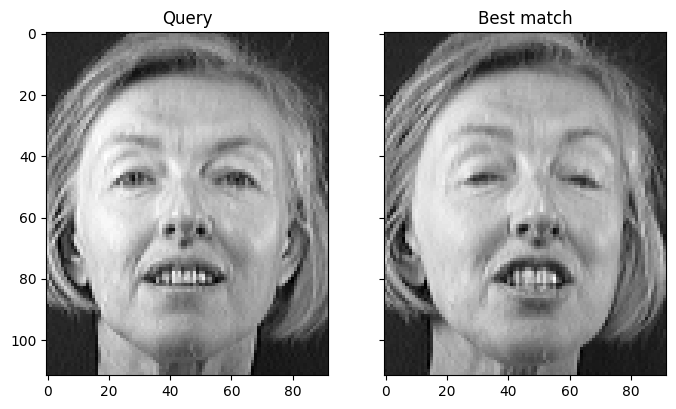

Best match s33 with Euclidean distance 1337418.539537


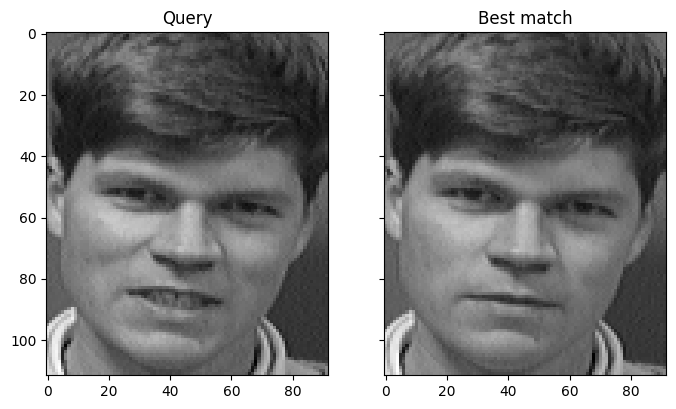

Best match s34 with Euclidean distance 2009873.440030


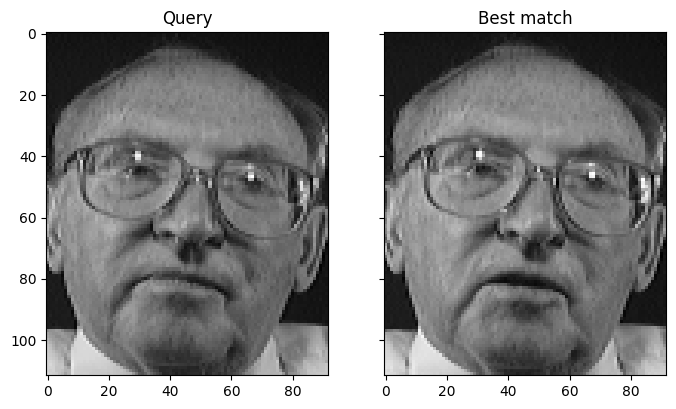

Best match s40 with Euclidean distance 8086314.398527


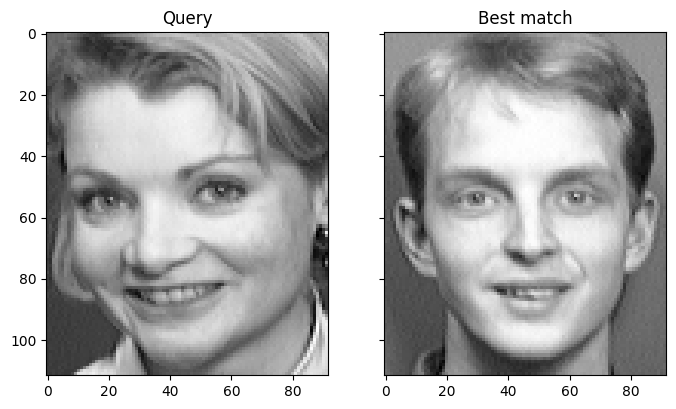

Best match s36 with Euclidean distance 10745876.512673


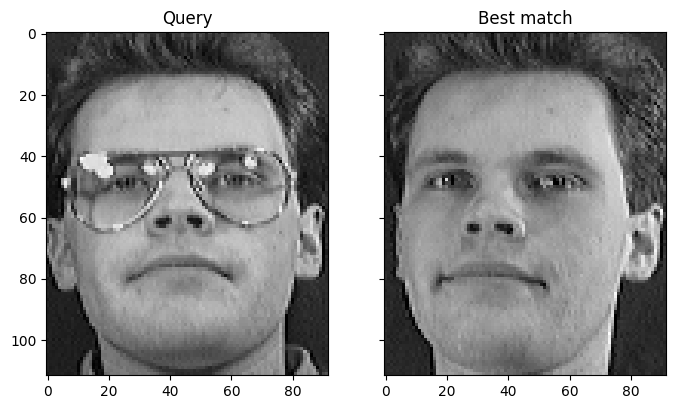

Best match s37 with Euclidean distance 3593541.089664


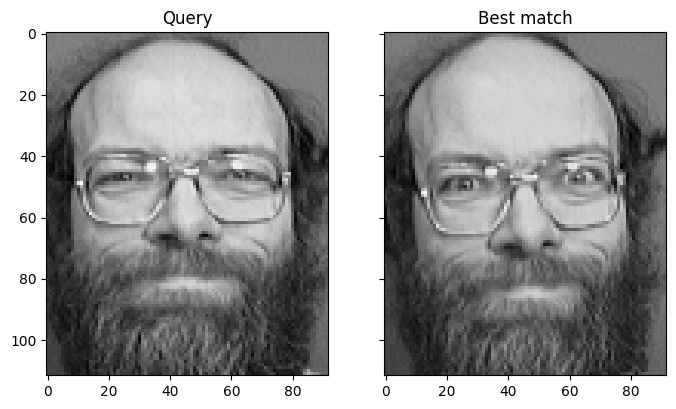

Best match s38 with Euclidean distance 4566459.830973


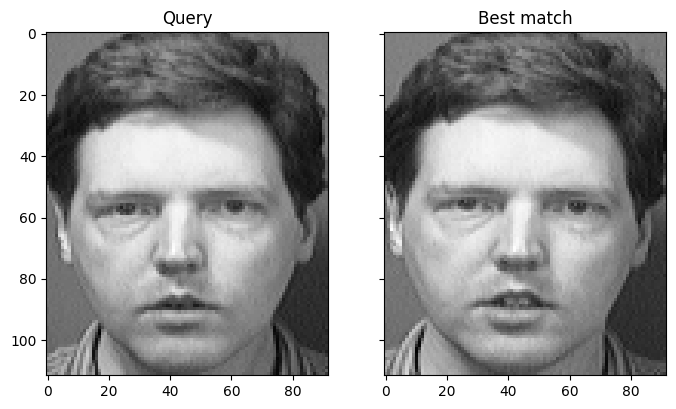

Best match s39 with Euclidean distance 7272138.054009


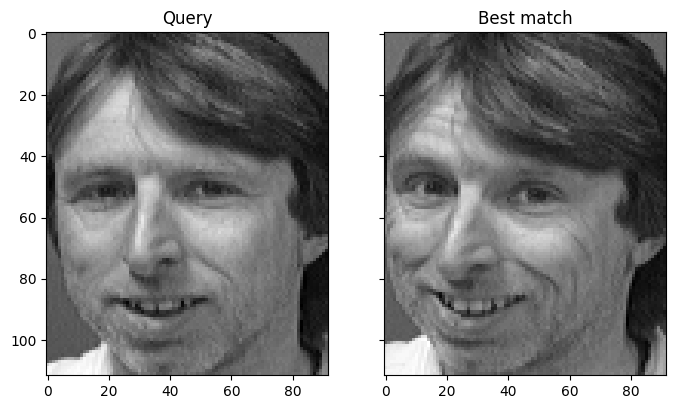

Best match s40 with Euclidean distance 7082284.594780


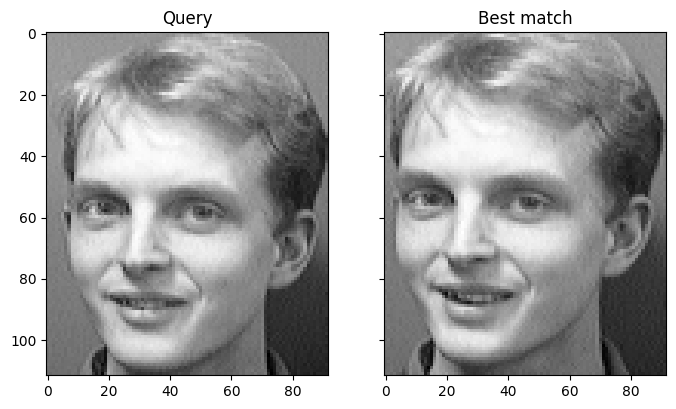

In [28]:
for i in range(1,41):
    query = faces[f"s{i}/10.pgm"].reshape(1,-1)
    query_weight = eigenfaces @ (query - mean_face).T
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()